# US Car Advertisement Dataset
# Exploratory Data Analysis

## Introduction

The dataset analyzed in this project involves car sales data related to make, model, and year of a car as well as other defining characteristics typically included in a car sale ad.  This exploratory data analysis will work to determine the features of the data, identify issues and remedy those issues, as well as display various visual representations of the dataset.  Also, initial observations and meaningful takeaways will be provided at the end based on this analysis.

## Load the Packages

In [1]:
!pip install streamlit

In [2]:
!pip install plotly.express

## Load the Data

In [3]:
import pandas as pd
import numpy as np 
from math import factorial
import streamlit as st
import plotly.express as px
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

## Initial Data Analysis

In [4]:
df_car_ads = pd.read_csv('vehicles_us.csv')

In [5]:
display(df_car_ads.head(10))
print()
df_car_ads.info()
print()
df_car_ads.describe()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  
5    automatic   sedan       black     1.0  2018-06-20           15  
6    automatic   sedan       white     NaN  2018-12-27           73  
7    automatic     SUV       black     1.0  2019-01-07           68  
8    automatic     SUV         NaN     1.0  2018-07-16           19  
9    automatic     SUV        blue     1.0  2019-02-15           17


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB



price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000

#### Summary

Initial data observations demonstrate that ads typically include make, model, year, condition, number of cylinders in the engine, type of fuel, measure of the odometer, the transmission type, car body type, color, is 2-wheel drive (2WD) or 4-wheel drive (4WD), and the number of the days spent on the market.

There are several areas that will need to be addressed when the data is fixed, which includes addressing missing values in the odometer column and the is_4wd column, and adjusting the date posted to datetime. 

## Fix the Data

### Duplicates

In [6]:
df_car_ads.duplicated().sum()

0

### Removing Ads for Classic, Vintage, and Antique Cars

Cars are "vintage" when they are manufactured between 1919 and 1930, "antique" when they are manufactured 1975 or earlier (>45 years old), and "classic" when they are manufactured 2000 or earlier.  For this reason, I decided to remove ads for any car for sale produced before 2000 as there are differen price parameters typical with these types of cars which all depend on upgrades or restorations and price will vary also based on availability.  Filtering out these special condition years will also remove ads without a model_year listed.  This removed 6,779 ads from the dataset.

In [7]:
df_car_ads_mod = pd.DataFrame(df_car_ads.loc[df_car_ads["model_year"] > 2000])

display(df_car_ads_mod)
print()
df_car_ads_mod.info()
print()
df_car_ads_mod.describe()

price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5      14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type paint_color  is_4wd date_posted  days_listed  
0        automatic     SUV         NaN     1.0  2018-06-23           19  
2        automatic   sedan         red     NaN  2019-02-07           79  
3        automatic  pickup         NaN     NaN  2019-03-22            9  
4        automatic   sedan       black     NaN  2019-04-02           28  
5        automatic   sedan       black     1.0  2018-06-20           15  
...            ...     ...         ...     ...         ...          ...  
51520    automatic   sedan       black     NaN  2018-10-03           37  
51521    automatic   sedan       white     NaN  2018-11-14           22  
51522    automatic   sedan        blue     NaN  2018-11-15           32  
51523    automatic   sedan       black     NaN  2018-07-02           71  
51524    automatic   sedan         NaN     NaN  2018-06-05           10  

[44746 rows x 13 columns]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44746 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         44746 non-null  int64  
 1   model_year    44746 non-null  float64
 2   model         44746 non-null  object 
 3   condition     44746 non-null  object 
 4   cylinders     40184 non-null  float64
 5   fuel          44746 non-null  object 
 6   odometer      37901 non-null  float64
 7   transmission  44746 non-null  object 
 8   type          44746 non-null  object 
 9   paint_color   36687 non-null  object 
 10  is_4wd        22301 non-null  float64
 11  date_posted   44746 non-null  object 
 12  days_listed   44746 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 4.8+ MB



price    model_year     cylinders       odometer   is_4wd  \
count   44746.000000  44746.000000  40184.000000   37901.000000  22301.0   
mean    12586.936911   2010.799558      6.081848  112252.085328      1.0   
std      9970.337529      4.598000      1.657836   62782.590969      0.0   
min         1.000000   2001.000000      3.000000       0.000000      1.0   
25%      5500.000000   2007.000000      4.000000   68000.000000      1.0   
50%      9900.000000   2011.000000      6.000000  110124.000000      1.0   
75%     17000.000000   2015.000000      8.000000  151000.000000      1.0   
max    300000.000000   2019.000000     12.000000  990000.000000      1.0   

        days_listed  
count  44746.000000  
mean      39.554642  
std       28.208801  
min        0.000000  
25%       19.000000  
50%       33.000000  
75%       53.000000  
max      271.000000

### Removing Price Outliers

As shown in the table above, the mean price is 12,500 dollars and median price is 9,900 dollars for each advertisement.  The outliers, or values that are significantly above the top quartile, skew the sales price data.  These cars are either rare, heavily modified which explains the high price, or are overly priced.  In order to get a better sense of the data I am going to find the upper and lower limits of the data in the 'price' column, which takes the mean and adds or subtracts 3 standard diviations from that mean respectively.

In [8]:
print("Upper limit",df_car_ads_mod['price'].mean() + 3*df_car_ads_mod['price'].std())
print("Lower limit",df_car_ads_mod['price'].mean() - 3*df_car_ads_mod['price'].std())

Upper limit 42497.94949748603
Lower limit -17324.07567636235


In [9]:
print(df_car_ads_mod['price'].count())

44746


###### Since the result shows a negative value for the lower limit, and a car cannot have a negative price, I will only consider the upper limit for trimming outliers.  Any ad showing a price above 42,498 (rounded up from the calculated value) will be removed from the data.  This removed a total of 556 ads from the sample, leaving 44,190 ads.

In [10]:
df_car_ads_mod= pd.DataFrame(df_car_ads_mod.loc[df_car_ads_mod['price'] < 42498])

display(df_car_ads_mod)
print()
df_car_ads_mod.info()
print()
df_car_ads_mod.describe()

price  model_year           model  condition  cylinders fuel  odometer  \
0       9400      2011.0          bmw x5       good        6.0  gas  145000.0   
2       5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3       1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4      14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5      14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
...      ...         ...             ...        ...        ...  ...       ...   
51520   9249      2013.0   nissan maxima   like new        6.0  gas   88136.0   
51521   2700      2002.0     honda civic    salvage        4.0  gas  181500.0   
51522   3950      2009.0  hyundai sonata  excellent        4.0  gas  128000.0   
51523   7455      2013.0  toyota corolla       good        4.0  gas  139573.0   
51524   6300      2014.0   nissan altima       good        4.0  gas       NaN   

      transmission    type paint_color  is_4wd date_posted  days_listed  
0        automatic     SUV         NaN     1.0  2018-06-23           19  
2        automatic   sedan         red     NaN  2019-02-07           79  
3        automatic  pickup         NaN     NaN  2019-03-22            9  
4        automatic   sedan       black     NaN  2019-04-02           28  
5        automatic   sedan       black     1.0  2018-06-20           15  
...            ...     ...         ...     ...         ...          ...  
51520    automatic   sedan       black     NaN  2018-10-03           37  
51521    automatic   sedan       white     NaN  2018-11-14           22  
51522    automatic   sedan        blue     NaN  2018-11-15           32  
51523    automatic   sedan       black     NaN  2018-07-02           71  
51524    automatic   sedan         NaN     NaN  2018-06-05           10  

[44190 rows x 13 columns]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44190 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         44190 non-null  int64  
 1   model_year    44190 non-null  float64
 2   model         44190 non-null  object 
 3   condition     44190 non-null  object 
 4   cylinders     39681 non-null  float64
 5   fuel          44190 non-null  object 
 6   odometer      37416 non-null  float64
 7   transmission  44190 non-null  object 
 8   type          44190 non-null  object 
 9   paint_color   36220 non-null  object 
 10  is_4wd        21804 non-null  float64
 11  date_posted   44190 non-null  object 
 12  days_listed   44190 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 4.7+ MB



price    model_year     cylinders       odometer   is_4wd  \
count  44190.000000  44190.000000  39681.000000   37416.000000  21804.0   
mean   12080.491537   2010.721227      6.063179  113275.263363      1.0   
std     8624.065650      4.566716      1.656568   62424.727185      0.0   
min        1.000000   2001.000000      3.000000       0.000000      1.0   
25%     5500.000000   2007.000000      4.000000   69995.000000      1.0   
50%     9795.000000   2011.000000      6.000000  111293.000000      1.0   
75%    16990.000000   2014.000000      8.000000  151505.000000      1.0   
max    42490.000000   2019.000000     12.000000  990000.000000      1.0   

        days_listed  
count  44190.000000  
mean      39.554062  
std       28.217600  
min        0.000000  
25%       19.000000  
50%       33.000000  
75%       53.000000  
max      271.000000

### Missingness

In [11]:
df_car_ads_mod.isna().sum()

price               0
model_year          0
model               0
condition           0
cylinders        4509
fuel                0
odometer         6774
transmission        0
type                0
paint_color      7970
is_4wd          22386
date_posted         0
days_listed         0
dtype: int64

###### Next Steps 

After filtering out the dataset to account for non-classic cars within 3 STD of the mean price, I am left with 44,190 car advertisements.  I have missingness that still needs to be addressed in the cylinders, odometer, paint_color, and is_4wd drive columns.

To address this missingness I will do the following:
- 'cylinders': use fillna() for the cylinders pending that there are similiar makes and models also advertised
- 'odometer': use median() odometer values for each year and mode
- 'paint_color': use fillna(unknown) for NaN paint color values
- 'is_4wd': replace() all NaN in is_4wd with 0 to represent cars that are 2 wheel drive

I will also do the following to enrich the data:
- convert date_posted to datetime
- separate make and model into two separate additional columns

#### Address Missingness in "Cylinders" column

* use ffill() to fill in NaN values for the 'cylinders' column using like information in the 'model' column.  For example, row 9 shown above for the Honda Pilot has NaN for cylinders, but the same model listed in row 7 has cylinders listed as 6.0.  Using ffill() takes the value from row 7 and inputs it in row 9 to replace the missingness.
<br><br>
* The new table shown below indicates this change, and rerunning info() shows that there are no more missing values in cylinders.

In [12]:
df_car_ads_mod['cylinders'] = df_car_ads_mod.groupby('model')['cylinders'].ffill()

display(df_car_ads_mod.head(10))

df_car_ads_mod.info()

price  model_year                     model  condition  cylinders fuel  \
0    9400      2011.0                    bmw x5       good        6.0  gas   
2    5500      2013.0            hyundai sonata   like new        4.0  gas   
3    1500      2003.0                ford f-150       fair        8.0  gas   
4   14900      2017.0              chrysler 200  excellent        4.0  gas   
5   14990      2014.0              chrysler 300  excellent        6.0  gas   
6   12990      2015.0              toyota camry  excellent        4.0  gas   
7   15990      2013.0               honda pilot  excellent        6.0  gas   
8   11500      2012.0               kia sorento  excellent        4.0  gas   
9    9200      2008.0               honda pilot  excellent        6.0  gas   
10  19500      2011.0  chevrolet silverado 1500  excellent        8.0  gas   

    odometer transmission    type paint_color  is_4wd date_posted  days_listed  
0   145000.0    automatic     SUV         NaN     1.0  2018-06-23           19  
2   110000.0    automatic   sedan         red     NaN  2019-02-07           79  
3        NaN    automatic  pickup         NaN     NaN  2019-03-22            9  
4    80903.0    automatic   sedan       black     NaN  2019-04-02           28  
5    57954.0    automatic   sedan       black     1.0  2018-06-20           15  
6    79212.0    automatic   sedan       white     NaN  2018-12-27           73  
7   109473.0    automatic     SUV       black     1.0  2019-01-07           68  
8   104174.0    automatic     SUV         NaN     1.0  2018-07-16           19  
9   147191.0    automatic     SUV        blue     1.0  2019-02-15           17  
10  128413.0    automatic  pickup       black     1.0  2018-09-17           38

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44190 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         44190 non-null  int64  
 1   model_year    44190 non-null  float64
 2   model         44190 non-null  object 
 3   condition     44190 non-null  object 
 4   cylinders     44184 non-null  float64
 5   fuel          44190 non-null  object 
 6   odometer      37416 non-null  float64
 7   transmission  44190 non-null  object 
 8   type          44190 non-null  object 
 9   paint_color   36220 non-null  object 
 10  is_4wd        21804 non-null  float64
 11  date_posted   44190 non-null  object 
 12  days_listed   44190 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 4.7+ MB


#### Addressing Missingness in 'Odomenter" column

In [13]:
median_odometer= df_car_ads_mod.groupby('model_year')['odometer'].median()

print(median_odometer)

model_year
2001.0    179183.0
2002.0    160000.0
2003.0    161397.0
2004.0    156640.0
2005.0    153000.0
2006.0    151265.0
2007.0    143000.0
2008.0    142000.0
2009.0    131507.0
2010.0    127381.0
2011.0    123618.0
2012.0    110569.5
2013.0     99891.0
2014.0     90000.0
2015.0     78835.5
2016.0     54226.0
2017.0     41000.0
2018.0     20627.0
2019.0     15885.0
Name: odometer, dtype: float64


In [14]:
df_car_ads_mod['odometer'] = df_car_ads_mod['odometer'].fillna(0)

display(df_car_ads_mod.head(10))

price  model_year                     model  condition  cylinders fuel  \
0    9400      2011.0                    bmw x5       good        6.0  gas   
2    5500      2013.0            hyundai sonata   like new        4.0  gas   
3    1500      2003.0                ford f-150       fair        8.0  gas   
4   14900      2017.0              chrysler 200  excellent        4.0  gas   
5   14990      2014.0              chrysler 300  excellent        6.0  gas   
6   12990      2015.0              toyota camry  excellent        4.0  gas   
7   15990      2013.0               honda pilot  excellent        6.0  gas   
8   11500      2012.0               kia sorento  excellent        4.0  gas   
9    9200      2008.0               honda pilot  excellent        6.0  gas   
10  19500      2011.0  chevrolet silverado 1500  excellent        8.0  gas   

    odometer transmission    type paint_color  is_4wd date_posted  days_listed  
0   145000.0    automatic     SUV         NaN     1.0  2018-06-23           19  
2   110000.0    automatic   sedan         red     NaN  2019-02-07           79  
3        0.0    automatic  pickup         NaN     NaN  2019-03-22            9  
4    80903.0    automatic   sedan       black     NaN  2019-04-02           28  
5    57954.0    automatic   sedan       black     1.0  2018-06-20           15  
6    79212.0    automatic   sedan       white     NaN  2018-12-27           73  
7   109473.0    automatic     SUV       black     1.0  2019-01-07           68  
8   104174.0    automatic     SUV         NaN     1.0  2018-07-16           19  
9   147191.0    automatic     SUV        blue     1.0  2019-02-15           17  
10  128413.0    automatic  pickup       black     1.0  2018-09-17           38

In [15]:
df_car_ads_mod['odometer'] = [x[1]['odometer'] if x[1]['odometer']!= 0\
                              else median_odometer[x[1]['model_year']] for x in df_car_ads_mod.iterrows()  ]

In [16]:
df_car_ads_mod.head(10)

price  model_year                     model  condition  cylinders fuel  \
0    9400      2011.0                    bmw x5       good        6.0  gas   
2    5500      2013.0            hyundai sonata   like new        4.0  gas   
3    1500      2003.0                ford f-150       fair        8.0  gas   
4   14900      2017.0              chrysler 200  excellent        4.0  gas   
5   14990      2014.0              chrysler 300  excellent        6.0  gas   
6   12990      2015.0              toyota camry  excellent        4.0  gas   
7   15990      2013.0               honda pilot  excellent        6.0  gas   
8   11500      2012.0               kia sorento  excellent        4.0  gas   
9    9200      2008.0               honda pilot  excellent        6.0  gas   
10  19500      2011.0  chevrolet silverado 1500  excellent        8.0  gas   

    odometer transmission    type paint_color  is_4wd date_posted  days_listed  
0   145000.0    automatic     SUV         NaN     1.0  2018-06-23           19  
2   110000.0    automatic   sedan         red     NaN  2019-02-07           79  
3   161397.0    automatic  pickup         NaN     NaN  2019-03-22            9  
4    80903.0    automatic   sedan       black     NaN  2019-04-02           28  
5    57954.0    automatic   sedan       black     1.0  2018-06-20           15  
6    79212.0    automatic   sedan       white     NaN  2018-12-27           73  
7   109473.0    automatic     SUV       black     1.0  2019-01-07           68  
8   104174.0    automatic     SUV         NaN     1.0  2018-07-16           19  
9   147191.0    automatic     SUV        blue     1.0  2019-02-15           17  
10  128413.0    automatic  pickup       black     1.0  2018-09-17           38

had to fill NaN w/ 0 as doing a direct loop did not work and np.nan was not recognized
fillna(0) replaced NaN with 0 values, then looped in median values per model_year

#### Addressing Missingness in "paint_color" column

In [17]:
df_car_ads_mod['paint_color'] = df_car_ads_mod['paint_color'].fillna('unknown')

df_car_ads_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44190 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         44190 non-null  int64  
 1   model_year    44190 non-null  float64
 2   model         44190 non-null  object 
 3   condition     44190 non-null  object 
 4   cylinders     44184 non-null  float64
 5   fuel          44190 non-null  object 
 6   odometer      44190 non-null  float64
 7   transmission  44190 non-null  object 
 8   type          44190 non-null  object 
 9   paint_color   44190 non-null  object 
 10  is_4wd        21804 non-null  float64
 11  date_posted   44190 non-null  object 
 12  days_listed   44190 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 4.7+ MB


#### Addressing Missingness in "is_4wd" column

In [18]:
df_car_ads_mod['is_4wd'] = df_car_ads_mod['is_4wd'].fillna(0)

display(df_car_ads_mod.sample(10))
print()
df_car_ads_mod.info()

price  model_year                        model  condition  cylinders  \
50914  10495      2014.0                  ford escape  excellent        6.0   
33687   3500      2001.0                 toyota camry  excellent        4.0   
6296    1895      2009.0           chevrolet traverse  excellent        6.0   
7598   13900      2014.0                    ford f150  excellent        6.0   
23504  13500      2014.0             chevrolet impala  excellent        6.0   
49616   5100      2006.0             chevrolet impala  excellent        6.0   
15542  15900      2019.0          dodge grand caravan  excellent        6.0   
15923  18200      2012.0  nissan frontier crew cab sv       good        6.0   
11133   9999      2014.0                buick enclave  excellent        6.0   
42884  12995      2013.0                 nissan rogue  excellent        4.0   

      fuel  odometer transmission      type paint_color  is_4wd date_posted  \
50914  gas   75605.0    automatic       SUV        grey     0.0  2018-07-19   
33687  gas  124440.0    automatic     sedan     unknown     0.0  2018-09-08   
6296   gas  153000.0    automatic       SUV       white     0.0  2019-01-27   
7598   gas  145868.0    automatic    pickup       white     1.0  2018-07-16   
23504  gas   90000.0    automatic     sedan      silver     0.0  2018-05-10   
49616  gas   76000.0    automatic     sedan        blue     0.0  2019-03-02   
15542  gas   19753.0    automatic  mini-van        grey     0.0  2019-01-18   
15923  gas   24807.0        other    pickup       white     0.0  2018-12-13   
11133  gas  178000.0    automatic       SUV      silver     1.0  2018-05-09   
42884  gas   46150.0    automatic     wagon       black     1.0  2018-08-05   

       days_listed  
50914           25  
33687          104  
6296            77  
7598            93  
23504           33  
49616            9  
15542           56  
15923           36  
11133           33  
42884           69


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44190 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         44190 non-null  int64  
 1   model_year    44190 non-null  float64
 2   model         44190 non-null  object 
 3   condition     44190 non-null  object 
 4   cylinders     44184 non-null  float64
 5   fuel          44190 non-null  object 
 6   odometer      44190 non-null  float64
 7   transmission  44190 non-null  object 
 8   type          44190 non-null  object 
 9   paint_color   44190 non-null  object 
 10  is_4wd        44190 non-null  float64
 11  date_posted   44190 non-null  object 
 12  days_listed   44190 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 4.7+ MB


#### Converting the "date_posted" column to datetime format

In [19]:
df_car_ads_mod['date_posted'] = pd.to_datetime(df_car_ads_mod['date_posted'], format ='%Y-%m-%d')

#### Separate the make and model into two separate columns

In [20]:
df_car_ads_mod['make']= df_car_ads_mod.model.str.split().str.get(0)

display(df_car_ads_mod.head(10))

price  model_year                     model  condition  cylinders fuel  \
0    9400      2011.0                    bmw x5       good        6.0  gas   
2    5500      2013.0            hyundai sonata   like new        4.0  gas   
3    1500      2003.0                ford f-150       fair        8.0  gas   
4   14900      2017.0              chrysler 200  excellent        4.0  gas   
5   14990      2014.0              chrysler 300  excellent        6.0  gas   
6   12990      2015.0              toyota camry  excellent        4.0  gas   
7   15990      2013.0               honda pilot  excellent        6.0  gas   
8   11500      2012.0               kia sorento  excellent        4.0  gas   
9    9200      2008.0               honda pilot  excellent        6.0  gas   
10  19500      2011.0  chevrolet silverado 1500  excellent        8.0  gas   

    odometer transmission    type paint_color  is_4wd date_posted  \
0   145000.0    automatic     SUV     unknown     1.0  2018-06-23   
2   110000.0    automatic   sedan         red     0.0  2019-02-07   
3   161397.0    automatic  pickup     unknown     0.0  2019-03-22   
4    80903.0    automatic   sedan       black     0.0  2019-04-02   
5    57954.0    automatic   sedan       black     1.0  2018-06-20   
6    79212.0    automatic   sedan       white     0.0  2018-12-27   
7   109473.0    automatic     SUV       black     1.0  2019-01-07   
8   104174.0    automatic     SUV     unknown     1.0  2018-07-16   
9   147191.0    automatic     SUV        blue     1.0  2019-02-15   
10  128413.0    automatic  pickup       black     1.0  2018-09-17   

    days_listed       make  
0            19        bmw  
2            79    hyundai  
3             9       ford  
4            28   chrysler  
5            15   chrysler  
6            73     toyota  
7            68      honda  
8            19        kia  
9            17      honda  
10           38  chevrolet

In [21]:
df_car_ads_mod['model_ind']= df_car_ads_mod.model.str.split().str.get(1)
#model_ind is a new column name which only identifies the model of the car independent (ind) of the make

display(df_car_ads_mod.head(10))

price  model_year                     model  condition  cylinders fuel  \
0    9400      2011.0                    bmw x5       good        6.0  gas   
2    5500      2013.0            hyundai sonata   like new        4.0  gas   
3    1500      2003.0                ford f-150       fair        8.0  gas   
4   14900      2017.0              chrysler 200  excellent        4.0  gas   
5   14990      2014.0              chrysler 300  excellent        6.0  gas   
6   12990      2015.0              toyota camry  excellent        4.0  gas   
7   15990      2013.0               honda pilot  excellent        6.0  gas   
8   11500      2012.0               kia sorento  excellent        4.0  gas   
9    9200      2008.0               honda pilot  excellent        6.0  gas   
10  19500      2011.0  chevrolet silverado 1500  excellent        8.0  gas   

    odometer transmission    type paint_color  is_4wd date_posted  \
0   145000.0    automatic     SUV     unknown     1.0  2018-06-23   
2   110000.0    automatic   sedan         red     0.0  2019-02-07   
3   161397.0    automatic  pickup     unknown     0.0  2019-03-22   
4    80903.0    automatic   sedan       black     0.0  2019-04-02   
5    57954.0    automatic   sedan       black     1.0  2018-06-20   
6    79212.0    automatic   sedan       white     0.0  2018-12-27   
7   109473.0    automatic     SUV       black     1.0  2019-01-07   
8   104174.0    automatic     SUV     unknown     1.0  2018-07-16   
9   147191.0    automatic     SUV        blue     1.0  2019-02-15   
10  128413.0    automatic  pickup       black     1.0  2018-09-17   

    days_listed       make  model_ind  
0            19        bmw         x5  
2            79    hyundai     sonata  
3             9       ford      f-150  
4            28   chrysler        200  
5            15   chrysler        300  
6            73     toyota      camry  
7            68      honda      pilot  
8            19        kia    sorento  
9            17      honda      pilot  
10           38  chevrolet  silverado

## Data Visualization

### <i>Let's revisit the dataset</i>

In [22]:
display(df_car_ads_mod.head(10))
print()
df_car_ads_mod.describe()

price  model_year                     model  condition  cylinders fuel  \
0    9400      2011.0                    bmw x5       good        6.0  gas   
2    5500      2013.0            hyundai sonata   like new        4.0  gas   
3    1500      2003.0                ford f-150       fair        8.0  gas   
4   14900      2017.0              chrysler 200  excellent        4.0  gas   
5   14990      2014.0              chrysler 300  excellent        6.0  gas   
6   12990      2015.0              toyota camry  excellent        4.0  gas   
7   15990      2013.0               honda pilot  excellent        6.0  gas   
8   11500      2012.0               kia sorento  excellent        4.0  gas   
9    9200      2008.0               honda pilot  excellent        6.0  gas   
10  19500      2011.0  chevrolet silverado 1500  excellent        8.0  gas   

    odometer transmission    type paint_color  is_4wd date_posted  \
0   145000.0    automatic     SUV     unknown     1.0  2018-06-23   
2   110000.0    automatic   sedan         red     0.0  2019-02-07   
3   161397.0    automatic  pickup     unknown     0.0  2019-03-22   
4    80903.0    automatic   sedan       black     0.0  2019-04-02   
5    57954.0    automatic   sedan       black     1.0  2018-06-20   
6    79212.0    automatic   sedan       white     0.0  2018-12-27   
7   109473.0    automatic     SUV       black     1.0  2019-01-07   
8   104174.0    automatic     SUV     unknown     1.0  2018-07-16   
9   147191.0    automatic     SUV        blue     1.0  2019-02-15   
10  128413.0    automatic  pickup       black     1.0  2018-09-17   

    days_listed       make  model_ind  
0            19        bmw         x5  
2            79    hyundai     sonata  
3             9       ford      f-150  
4            28   chrysler        200  
5            15   chrysler        300  
6            73     toyota      camry  
7            68      honda      pilot  
8            19        kia    sorento  
9            17      honda      pilot  
10           38  chevrolet  silverado

price    model_year     cylinders       odometer        is_4wd  \
count  44190.000000  44190.000000  44184.000000   44190.000000  44190.000000   
mean   12080.491537   2010.721227      6.062217  113195.132677      0.493415   
std     8624.065650      4.566716      1.656528   59316.349663      0.499962   
min        1.000000   2001.000000      3.000000       1.000000      0.000000   
25%     5500.000000   2007.000000      4.000000   73296.000000      0.000000   
50%     9795.000000   2011.000000      6.000000  112000.000000      0.000000   
75%    16990.000000   2014.000000      8.000000  150120.750000      1.000000   
max    42490.000000   2019.000000     12.000000  990000.000000      1.000000   

        days_listed  
count  44190.000000  
mean      39.554062  
std       28.217600  
min        0.000000  
25%       19.000000  
50%       33.000000  
75%       53.000000  
max      271.000000

In [54]:
fig = px.scatter(df_car_ads_mod, x="days_listed", y="price", color="condition",
                 size='days_listed', hover_data=['make','type'], color_discrete_sequence=px.colors.qualitative.Light24,
                 width = 1000, height = 1000, title='The Number of Days Ad is Listed Per Price and Condition of Vehicle')

fig.show()

### Ads by Manufacturer

In [24]:
ads_by_make= pd.DataFrame(df_car_ads_mod.groupby('make')['model'].count())

ads_by_make.reset_index(inplace=True)

ads_by_make.columns = ['make', 'number of ads']

print(ads_by_make)

             make  number of ads
0           acura            221
1             bmw            245
2           buick            257
3        cadillac            257
4       chevrolet           8916
5        chrysler            776
6           dodge           1095
7            ford          10637
8             gmc           2022
9           honda           3060
10        hyundai           1093
11           jeep           2688
12            kia            544
13  mercedes-benz             34
14         nissan           2921
15            ram           2791
16         subaru           1125
17         toyota           4717
18     volkswagen            791


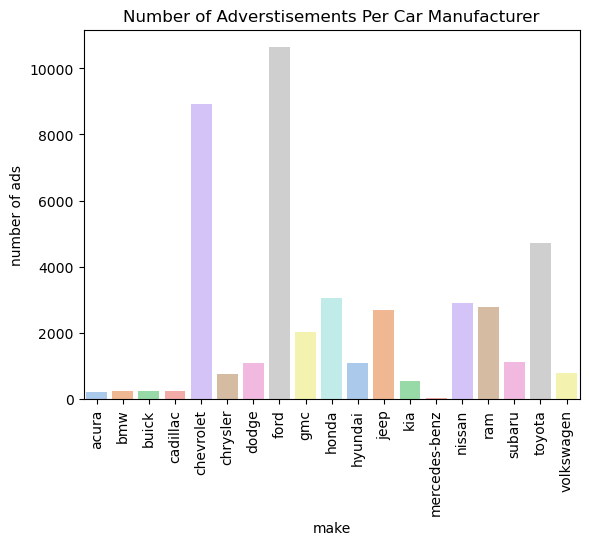

In [25]:
sns.barplot(x = 'make', y = 'number of ads', data = ads_by_make, palette='pastel')

plt.xticks(rotation=90)
plt.title('Number of Adverstisements Per Car Manufacturer')
 
plt.show()

In [26]:
fig = px.pie(ads_by_make,
             values='number of ads',
             names='make',
             title='Number of Ads Per Car Manufacturer',
             color='make',
             color_discrete_sequence=px.colors.qualitative.Light24)

fig.show()

### Ads by Manufacturer and Model

In [27]:
ads_by_make_model= pd.DataFrame(df_car_ads_mod.groupby(['make', 'model_ind'])['model'].count())

ads_by_make_model.reset_index(inplace=True)

print(ads_by_make_model)

          make model_ind  model
0        acura        tl    221
1          bmw        x5    245
2        buick   enclave    257
3     cadillac  escalade    257
4    chevrolet    camaro    604
..         ...       ...    ...
75      toyota    sienna    293
76      toyota    tacoma    708
77      toyota    tundra    536
78  volkswagen     jetta    476
79  volkswagen    passat    315

[80 rows x 3 columns]


In [28]:
fig = px.sunburst(ads_by_make_model,
                  path=['make', 'model_ind'],
                  values='model',
                  color='model',
                  color_continuous_scale=px.colors.sequential.Plasma_r,
                 title='Make and Model of Car Sales')
fig.show()


### Ads by Type of Vehicle

In [29]:
ads_by_type= pd.DataFrame(df_car_ads_mod.groupby('type')['make'].count())

ads_by_type.reset_index(inplace=True)

ads_by_type.columns = ['type', 'number_of_ads']

print(ads_by_type)

           type  number_of_ads
0           SUV          10730
1           bus             21
2   convertible            265
3         coupe           1773
4     hatchback            933
5      mini-van           1045
6       offroad            147
7         other            202
8        pickup           5734
9         sedan          10974
10        truck          10428
11          van            568
12        wagon           1370


In [30]:
fig = px.bar(ads_by_type,
             x = 'type',
             y = 'number_of_ads',
             color='type',
             color_discrete_sequence=px.colors.qualitative.Light24,
            title='Number of Ads Per Vehicle Type')
fig.show()

### Average Price Per Manufacturer

In [31]:
avg_price_per_make= pd.DataFrame(df_car_ads_mod.groupby('make')['price'].mean())

avg_price_per_make.reset_index(inplace=True)

print(avg_price_per_make)

             make         price
0           acura   6503.968326
1             bmw  10749.885714
2           buick  11619.428016
3        cadillac  13917.525292
4       chevrolet  13869.464558
5        chrysler   8261.826031
6           dodge   8211.599087
7            ford  12861.233619
8             gmc  15268.366963
9           honda   7592.825490
10        hyundai   7300.241537
11           jeep  13535.037202
12            kia   8633.176471
13  mercedes-benz  34900.000000
14         nissan   9380.017802
15            ram  18017.761376
16         subaru   9012.864889
17         toyota  10461.824253
18     volkswagen   7344.223767


In [32]:
num_ads_and_price_per_make= pd.DataFrame(avg_price_per_make.merge(ads_by_make,
                                                    on= 'make',
                                                    how= 'left'))

display(num_ads_and_price_per_make)

make         price  number of ads
0           acura   6503.968326            221
1             bmw  10749.885714            245
2           buick  11619.428016            257
3        cadillac  13917.525292            257
4       chevrolet  13869.464558           8916
5        chrysler   8261.826031            776
6           dodge   8211.599087           1095
7            ford  12861.233619          10637
8             gmc  15268.366963           2022
9           honda   7592.825490           3060
10        hyundai   7300.241537           1093
11           jeep  13535.037202           2688
12            kia   8633.176471            544
13  mercedes-benz  34900.000000             34
14         nissan   9380.017802           2921
15            ram  18017.761376           2791
16         subaru   9012.864889           1125
17         toyota  10461.824253           4717
18     volkswagen   7344.223767            791

In [33]:
fig = px.scatter(num_ads_and_price_per_make, x="price", y="number of ads",
                 size="number of ads", color="number of ads",
                 hover_name="make", log_x=True, size_max=60,
                 color_continuous_scale=px.colors.sequential.Plasma_r,
                title=' Price and Number of Ads Per Manufacturer')
fig.show()

### Averge Price Per Model Year

In [34]:
avg_price_per_year= pd.DataFrame(df_car_ads_mod.groupby('model_year')['price'].mean())

avg_price_per_year.reset_index(inplace=True)

print(avg_price_per_year)

    model_year         price
0       2001.0   5150.439053
1       2002.0   5676.895753
2       2003.0   5837.277855
3       2004.0   6442.348837
4       2005.0   6380.996047
5       2006.0   7542.638603
6       2007.0   7691.041998
7       2008.0   8566.359466
8       2009.0   8271.809913
9       2010.0   9400.272592
10      2011.0  11530.170175
11      2012.0  11901.384926
12      2013.0  13479.450748
13      2014.0  15101.418171
14      2015.0  17982.066991
15      2016.0  18866.681124
16      2017.0  19750.560684
17      2018.0  21055.025349
18      2019.0  20774.185304


In [35]:
fig = px.line(avg_price_per_year, x="model_year", y="price", title='Average Price Per Model Year of Vehicle')

fig.show()

### Average Price Per Type of Car

In [36]:
avg_price_per_type= pd.DataFrame(df_car_ads_mod.groupby('type')['price'].mean())

avg_price_per_type.reset_index(inplace=True)

print(avg_price_per_type)

           type         price
0           SUV  11098.876514
1           bus  18107.428571
2   convertible  14210.871698
3         coupe  14507.407219
4     hatchback   6854.397642
5      mini-van   8219.350239
6       offroad  16626.680272
7         other  10801.504950
8        pickup  16751.623300
9         sedan   7107.027702
10        truck  16557.857787
11          van  10480.765845
12        wagon   9199.313869


In [37]:
num_ads_and_price_per_type= pd.DataFrame(avg_price_per_type.merge(ads_by_type,
                                                    on= 'type',
                                                    how= 'left'))

display(num_ads_and_price_per_type)

type         price  number_of_ads
0           SUV  11098.876514          10730
1           bus  18107.428571             21
2   convertible  14210.871698            265
3         coupe  14507.407219           1773
4     hatchback   6854.397642            933
5      mini-van   8219.350239           1045
6       offroad  16626.680272            147
7         other  10801.504950            202
8        pickup  16751.623300           5734
9         sedan   7107.027702          10974
10        truck  16557.857787          10428
11          van  10480.765845            568
12        wagon   9199.313869           1370

In [38]:
fig = px.scatter(num_ads_and_price_per_type, x="price", y="number_of_ads",
                 size="number_of_ads", color="number_of_ads",
                 hover_name="type", log_x=True, size_max=60,
                 color_continuous_scale=px.colors.sequential.Plasma_r,
                title= 'Number of Ads and Price of Sale Per Vehicle Type')
fig.show()

### Price Per Condition of Car

In [39]:
avg_price_per_condition= pd.DataFrame(df_car_ads_mod.groupby('condition')['price'].mean())

avg_price_per_condition.reset_index(inplace=True)

print(avg_price_per_condition)

   condition         price
0  excellent  12485.950187
1       fair   3749.891239
2       good  11186.661497
3   like new  15581.870773
4        new  17925.650000
5    salvage   5160.897436


In [40]:
num_ads_per_condition= pd.DataFrame(df_car_ads_mod.groupby('condition')['type'].count())

num_ads_per_condition.reset_index(inplace=True)

num_ads_per_condition.columns = ['condition', 'number_of_ads']

print(num_ads_per_condition)

   condition  number_of_ads
0  excellent          21922
1       fair            993
2       good          16957
3   like new           4140
4        new            100
5    salvage             78


In [41]:
num_ads_and_price_per_condition= pd.DataFrame(avg_price_per_condition.merge(num_ads_per_condition,
                                                    on= 'condition',
                                                    how= 'left'))

display(num_ads_and_price_per_condition)

condition         price  number_of_ads
0  excellent  12485.950187          21922
1       fair   3749.891239            993
2       good  11186.661497          16957
3   like new  15581.870773           4140
4        new  17925.650000            100
5    salvage   5160.897436             78

### Number of Days Listed Per Manufactuer

In [42]:
avg_days_per_make= pd.DataFrame(df_car_ads_mod.groupby('make')['days_listed'].mean())

avg_days_per_make.reset_index(inplace=True)

print(avg_days_per_make)

             make  days_listed
0           acura    39.552036
1             bmw    42.257143
2           buick    39.202335
3        cadillac    41.268482
4       chevrolet    39.434163
5        chrysler    38.313144
6           dodge    40.356164
7            ford    39.522234
8             gmc    40.918398
9           honda    39.215359
10        hyundai    38.687100
11           jeep    39.688244
12            kia    42.281250
13  mercedes-benz    37.500000
14         nissan    38.723382
15            ram    39.842709
16         subaru    39.564444
17         toyota    39.490566
18     volkswagen    39.351454


### Number of Days Listed Per Year of Car

In [43]:
avg_days_per_year= pd.DataFrame(df_car_ads_mod.groupby('model_year')['days_listed'].mean())

avg_days_per_year.reset_index(inplace=True)

print(avg_days_per_year)

    model_year  days_listed
0       2001.0    39.728994
1       2002.0    39.138031
2       2003.0    38.686630
3       2004.0    39.958721
4       2005.0    39.643281
5       2006.0    39.239588
6       2007.0    39.424518
7       2008.0    39.973297
8       2009.0    40.454283
9       2010.0    40.463369
10      2011.0    39.975689
11      2012.0    39.883627
12      2013.0    39.323455
13      2014.0    39.466803
14      2015.0    38.864799
15      2016.0    38.944830
16      2017.0    39.514957
17      2018.0    38.547853
18      2019.0    42.000000


### Number of Days Listed Per Type of Car

In [44]:
avg_days_per_type= pd.DataFrame(df_car_ads_mod.groupby('type')['days_listed'].mean())

avg_days_per_type.reset_index(inplace=True)

print(avg_days_per_type)

           type  days_listed
0           SUV    39.806803
1           bus    44.619048
2   convertible    37.750943
3         coupe    39.047941
4     hatchback    41.203644
5      mini-van    39.458373
6       offroad    41.244898
7         other    38.549505
8        pickup    39.428322
9         sedan    39.488701
10        truck    39.128404
11          van    40.963028
12        wagon    41.122628


### Number of days per Condition of Car

In [45]:
avg_days_per_condition= pd.DataFrame(df_car_ads_mod.groupby('condition')['days_listed'].mean())

avg_days_per_condition.reset_index(inplace=True)

print(avg_days_per_condition)

   condition  days_listed
0  excellent    39.559392
1       fair    38.765358
2       good    39.680840
3   like new    39.285266
4        new    35.220000
5    salvage    40.358974


### Automatic vs Manual & Sale Price

In [46]:
price_per_transmission= df_car_ads_mod.groupby('transmission')['price'].mean()

print(price_per_transmission)

transmission
automatic    11948.169254
manual       10157.416624
other        17658.350824
Name: price, dtype: float64


### Automatic vs Manual & Days Listed

In [47]:
price_per_transmission_duration= df_car_ads_mod.groupby('transmission')['days_listed'].mean()

print(price_per_transmission_duration)

transmission
automatic    39.603104
manual       39.351351
other        38.582062
Name: days_listed, dtype: float64


### 4wd vs 2wd & sale price

In [48]:
price_per_drive= df_car_ads_mod.groupby('is_4wd')['price'].mean()

print(price_per_drive)

is_4wd
0.0     9028.141160
1.0    15214.316318
Name: price, dtype: float64


### 4wd vs 2wd & days listed

In [49]:
price_per_drive_duration= df_car_ads_mod.groupby('is_4wd')['days_listed'].mean()

print(price_per_drive_duration)

is_4wd
0.0    39.496248
1.0    39.613420
Name: days_listed, dtype: float64


### Color & Sale Price

In [50]:
price_per_color= df_car_ads_mod.groupby('paint_color')['price'].mean()

print(price_per_color)

paint_color
black      13286.081117
blue       10273.394466
brown      10799.572854
custom     10080.738911
green       9418.839836
grey       11252.097648
orange     14475.015873
purple      7568.875000
red        11855.984790
silver     10556.327589
unknown    12136.875659
white      13982.339094
yellow     15801.346154
Name: price, dtype: float64


### Color & Days Listed

In [51]:
days_per_color= df_car_ads_mod.groupby('paint_color')['days_listed'].mean()

print(days_per_color)

paint_color
black      39.733769
blue       39.945191
brown      40.891218
custom     38.395161
green      40.568789
grey       39.544385
orange     38.402116
purple     38.888889
red        39.737832
silver     39.265661
unknown    39.353827
white      39.432391
yellow     39.634615
Name: days_listed, dtype: float64


### Price vs Days Listed

In [52]:
days_per_price= pd.DataFrame(df_car_ads_mod.groupby('price')['days_listed'].mean())

days_per_price.reset_index(inplace=True)

print(days_per_price)

      price  days_listed
0         1    38.405995
1         3    22.000000
2         5     5.000000
3         9    12.000000
4        10    29.000000
...     ...          ...
3063  41998    83.000000
3064  41999    39.500000
3065  42000    51.500000
3066  42488    38.000000
3067  42490    30.000000

[3068 rows x 2 columns]


In [53]:
fig = px.line(days_per_price, x="price", y="days_listed", title='Average Price Per Days Advertisement is Listed')

fig.show()

# Conclusions

This exploratory data analysis served to determine various advertisement trends with a car sale dataset.  The analysis looked at various characteristics typical with automotives to determine trends related to length of sale, price of vehicle, condition of vehicle, and buyer preferences with transmission, color, make, and vehicle type.  The following inferences about these patterns include:
<br><br>
### Entire Dataset
1. There are several outliers in the price column over 100k which impact the data.  However, the vast majority of vehicle advertisements are under approximately 75k with the average price for all sales being 12k.
2. Although the highest number of days an ad was listed for was 271, the average number of days is 39.5
<br><br>
### Manufacturers
3. The most frequently advertised manufacterers are Ford and Chevrolet with 12,672 and 10,611 advertisements, respectively.  Furthermore, the F-150 and Silverado, were the two most popular types of vehicles within those brands.
4. The least advertised manufacterers are Mercedes-Benz and Acura with 41 and 236 ads, respectively
5. Mercedes-Benz had the highest average sale price of 34.9k even though they had the lowest number of advertisements
6. Price per vehicle, when outliers like classic cars or cars with significant after-market upgrades, typically increases the younger the model year.
<br><br>
### Customer Preferences
7. The average sale price for all the ads was 39.5k.  When looking at characteristics like color, transmission type, condition of vehicle, model year, type, and drive train, there is no significant difference in how long an ad is listed.  This means that customers are not purchasing cars based on these characteristics.
8. Price is not necessarily a deterent for purchasers as there does not appear to be a relationship between the number of days the ad is posted and the price of the car.
<br><br>
### Advertisement Trends
9. The most common types of ads are for SUV's, Sedans, and Trucks.  Trucks have the highest average price, followed by SUV's and then Sedans.
10. Even though SUV's, Sedans, and Trucks make up the bulk of the ads, there is no significant difference in how quickly they sell.  It is only an indicator of the most common types of cars
11. Resale price is more aligned with market norms based on the money factor of the manufacturer.